In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os.path
from os import path
np.random.seed(10)

# 1. Read/preparation of data

In [4]:
def get_average_data(data):
    average_data = np.zeros((len(data)//8,len(data[0]))) #new sample = average of 8 consecutive sample
    
    #calculate average
    k = 0
    n = 0
    for i in range(len(data)): 
        average_data[k] += data[i]
        
        if (n == 7):
            average_data[k] /= 8
            k += 1
            n = 0
        else:
            n += 1
            
    return average_data

In [5]:
#Read all training samples
subject1_t1 = np.loadtxt("data_psd/train_subject1_psd01.asc")
subject1_t2 = np.loadtxt("data_psd/train_subject1_psd02.asc")
subject1_t3 = np.loadtxt("data_psd/train_subject1_psd03.asc")

subject2_t1 = np.loadtxt("data_psd/train_subject2_psd01.asc")
subject2_t2 = np.loadtxt("data_psd/train_subject2_psd02.asc")
subject2_t3 = np.loadtxt("data_psd/train_subject2_psd03.asc")

subject3_t1 = np.loadtxt("data_psd/train_subject3_psd01.asc")
subject3_t2 = np.loadtxt("data_psd/train_subject3_psd02.asc")
subject3_t3 = np.loadtxt("data_psd/train_subject3_psd03.asc")

test1 = np.loadtxt("data_psd/test_subject1_psd04.asc")
test2 = np.loadtxt("data_psd/test_subject2_psd04.asc")
test3 = np.loadtxt("data_psd/test_subject3_psd04.asc")

labels1 = np.loadtxt("data_psd/labels1.asc")
labels2 = np.loadtxt("data_psd/labels2.asc")
labels3 = np.loadtxt("data_psd/labels3.asc")

subject1 = np.concatenate((subject1_t1, subject1_t2, subject1_t3), axis=0)
subject2 = np.concatenate((subject2_t1, subject2_t2, subject2_t3), axis=0)
subject3 = np.concatenate((subject3_t1, subject3_t2, subject3_t3), axis=0)

test = np.concatenate((test1,test2,test3), axis=0)
labels = np.concatenate((labels1,labels2,labels3), axis=0)

#add labels to data
raw_test = np.zeros((len(test),len(test[0])+1))
raw_test[:,:-1] = test
raw_test[:,96] = labels

raw_training = np.concatenate((subject1,subject2,subject3), axis=0)

In [6]:
# we average data to make predictions every 0.5 seconds
training = get_average_data(raw_training)
test = get_average_data(raw_test)

# For observing the difference in accuracy prediction between subjects
n_test1 = len(test1)//8
n_test2 = len(test2)//8
n_test3 = len(test3)//8

test_subject1 = test[0:n_test1]
test_subject2 = test[n_test1:n_test1+n_test2]
test_subject3 = test[n_test1+n_test2::]

print(len(raw_training))
print(len(training))


31216
3902


# 2. Data visualization/preprocess

## 2.1 First look at data

In [7]:
data = pd.DataFrame(training)
data[96] = data[96].replace([2.0, 3.0, 7.0], ['left','right', 'word'])
data['Class'] = data[96]
data = data.drop([96], axis=1)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,Class
0,0.005675,0.006918,0.009756,0.009997,0.008646,0.003083,0.003069,0.006235,0.004615,0.002894,...,0.012659,0.009407,0.007847,0.007736,0.004404,0.003209,0.003080,0.007394,0.005682,word
1,0.012367,0.019696,0.013642,0.005683,0.007301,0.004046,0.004780,0.013030,0.006524,0.004758,...,0.006319,0.008278,0.006927,0.008400,0.006167,0.003709,0.003443,0.005401,0.004377,word
2,0.016052,0.018407,0.010792,0.006479,0.007477,0.004350,0.003174,0.006212,0.001975,0.001382,...,0.004900,0.006082,0.007944,0.008053,0.014581,0.007726,0.002044,0.003796,0.002304,word
3,0.022011,0.024230,0.012957,0.007000,0.004942,0.005518,0.007626,0.005048,0.001655,0.002822,...,0.016382,0.006341,0.006907,0.003319,0.006925,0.004250,0.001662,0.002987,0.002854,word
4,0.018043,0.013725,0.005477,0.005104,0.005579,0.007084,0.007648,0.005296,0.002568,0.004957,...,0.012551,0.005926,0.005552,0.003130,0.006827,0.004613,0.001993,0.001924,0.001642,word


In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,...,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,0.021456,0.023911,0.019405,0.010401,0.007321,0.006625,0.006224,0.005672,0.004678,0.003915,...,0.014789,0.011464,0.009759,0.008608,0.007385,0.006430,0.005546,0.004871,0.004266,0.003668
std,0.015136,0.020130,0.014673,0.006391,0.004371,0.004134,0.003800,0.003510,0.002836,0.002605,...,0.008030,0.006564,0.005584,0.005076,0.004457,0.003948,0.003308,0.003060,0.002721,0.002409
min,0.001590,0.001153,0.001659,0.000854,0.000356,0.000533,0.000328,0.000454,0.000389,0.000274,...,0.001063,0.001216,0.001107,0.000511,0.000613,0.000632,0.000496,0.000189,0.000275,0.000334
25%,0.011705,0.011077,0.009596,0.005916,0.004272,0.003790,0.003605,0.003247,0.002659,0.002106,...,0.009085,0.006913,0.005796,0.005136,0.004216,0.003696,0.003153,0.002768,0.002377,0.002009
50%,0.017543,0.017318,0.015275,0.009053,0.006445,0.005641,0.005397,0.004900,0.004039,0.003263,...,0.013120,0.010134,0.008654,0.007503,0.006491,0.005645,0.004852,0.004183,0.003652,0.003122
75%,0.026190,0.029095,0.024602,0.013309,0.009350,0.008439,0.007832,0.007219,0.005993,0.005027,...,0.018721,0.014482,0.012497,0.010985,0.009490,0.008193,0.007129,0.006157,0.005427,0.004774
max,0.169052,0.154352,0.139760,0.083383,0.083631,0.061253,0.044344,0.045037,0.025920,0.022354,...,0.102134,0.074045,0.063084,0.073190,0.059685,0.054842,0.033016,0.037404,0.030816,0.041913


## 2.2. Standarize and correct distribution skewness

In [10]:
# apply transformations to data for posterior observation

data_transformed = data.copy()
for i in range(0,len(data.columns)-1): 
    
    # log
    x = np.log(data[i])  
    
    # standarization
    x = (x - x.mean())/x.std()
    
    data_transformed[i] = x

In [11]:
# plot configuration
sns.set_style('darkgrid')
sns.set_palette('deep')

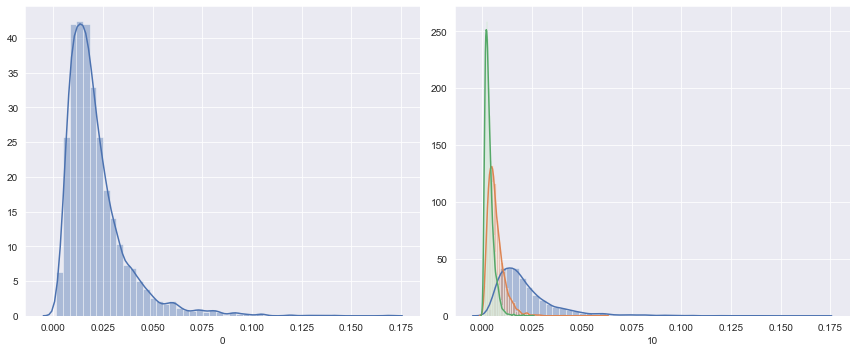

In [12]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,2,1)
sns.distplot(data[0])

ax = fig.add_subplot(1,2,2)
sns.distplot(data[0])
sns.distplot(data[5])
sns.distplot(data[10])

fig.tight_layout()
plt.savefig('figures/data.png')

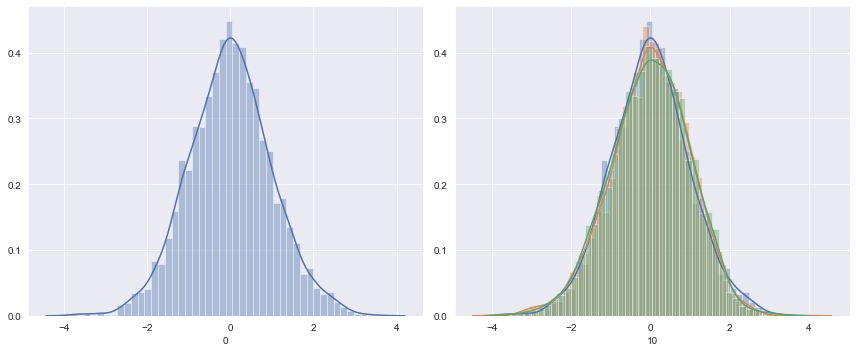

In [13]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,2,1)
# ax.title.set_text('Feature distribution')
sns.distplot(data_transformed[0])

ax = fig.add_subplot(1,2,2)
sns.distplot(data_transformed[0])
sns.distplot(data_transformed[5])
sns.distplot(data_transformed[10])

fig.tight_layout()
plt.savefig('figures/data_transformed.png')

## 2.3 Principal Component Analysis (PCA)

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def PCA_visualization(data, variance_explained):
    GroupedData = data.sort_values('Class')
    GroupedFeatures = GroupedData.drop(columns='Class')

    myPCA = PCA(variance_explained)
    myPCA.fit(StandardScaler().fit_transform(GroupedFeatures));
    
    transformed = myPCA.transform(GroupedFeatures)
    print('Number of principal components: ', len(transformed[0]), '/', len(GroupedFeatures.columns))
    
    transformed = pd.DataFrame(transformed)
    transformed['Class'] = GroupedData['Class']
 
    ax = sns.scatterplot(x=0, y=1, hue='Class',data=transformed, alpha = 0.4)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    
    print('Explained Variance Ratios: \n ',myPCA.explained_variance_ratio_)  


Number of principal components:  66 / 96
Explained Variance Ratios: 
  [0.15504043 0.05962415 0.04294841 0.03732404 0.02940266 0.02378569
 0.02262447 0.02107416 0.02062515 0.01862916 0.0175431  0.01749477
 0.01678233 0.01632752 0.01570332 0.01534102 0.01469742 0.0145627
 0.01404955 0.01389818 0.01381995 0.01326889 0.01318319 0.01292005
 0.01233003 0.01228492 0.01197041 0.01161879 0.01140799 0.01117639
 0.01085326 0.01057955 0.01036744 0.00999158 0.00981408 0.00967263
 0.0093919  0.0086317  0.00841209 0.0082775  0.00818191 0.00799326
 0.00771861 0.00745459 0.00725854 0.00698632 0.00665274 0.00639528
 0.00620877 0.00607465 0.00593431 0.00568664 0.00537723 0.00515779
 0.00511452 0.00497092 0.00486318 0.00452711 0.00437267 0.00426278
 0.00399332 0.00373195 0.00365869 0.00353948 0.00341426 0.00334593]


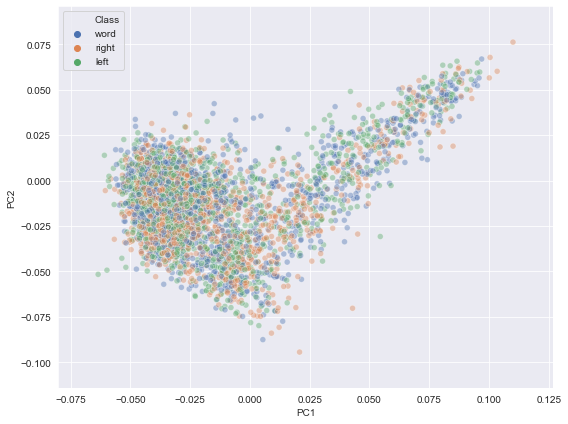

In [15]:
fig = plt.figure(figsize=(8,6))

PCA_visualization(data, 0.95)

fig.tight_layout()
plt.savefig('figures/PCA_data.png')

Number of principal components:  65 / 96
Explained Variance Ratios: 
  [0.20573583 0.0594366  0.04193583 0.03029693 0.02661968 0.02220581
 0.02109932 0.01946762 0.01879054 0.01754217 0.0168012  0.01650252
 0.01593857 0.01556843 0.01529332 0.01501863 0.01450413 0.01419216
 0.0139442  0.01352987 0.01294988 0.01271259 0.01261459 0.0121861
 0.01172159 0.01153817 0.01116385 0.01108772 0.01090984 0.01054992
 0.01029164 0.00998008 0.00980888 0.00944567 0.00936847 0.00891613
 0.00871785 0.00808786 0.00776482 0.00773523 0.00751536 0.00723792
 0.00716012 0.00703634 0.00672672 0.00645254 0.00608856 0.00593203
 0.00578781 0.00565523 0.00538159 0.00519474 0.0051765  0.00497687
 0.00475235 0.00467961 0.00441953 0.00432268 0.00406176 0.00397524
 0.00377854 0.00362363 0.00347791 0.00330686 0.00311484]


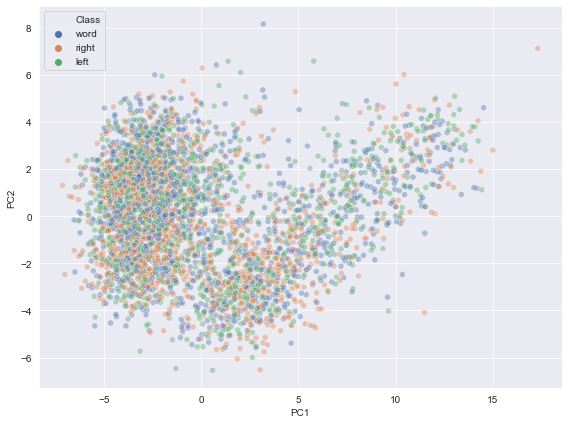

In [16]:
fig = plt.figure(figsize=(8,6))

PCA_visualization(data_transformed, 0.95)

fig.tight_layout()
plt.savefig('figures/PCA_data_transformed.png')

## 2.4 Linear discriminant analysis (LDA) visualization

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def LDA_visualization(data):

    lda_model = LinearDiscriminantAnalysis()
    transformed = pd.DataFrame(lda_model.fit_transform(data.drop(columns='Class'), data['Class']))
    transformed['Class'] = data['Class']
    
    ax = sns.scatterplot(x=0, y=1, hue='Class', data=transformed, alpha=0.4)
    ax.set_xlabel("LDA1")
    ax.set_ylabel("LDA2")


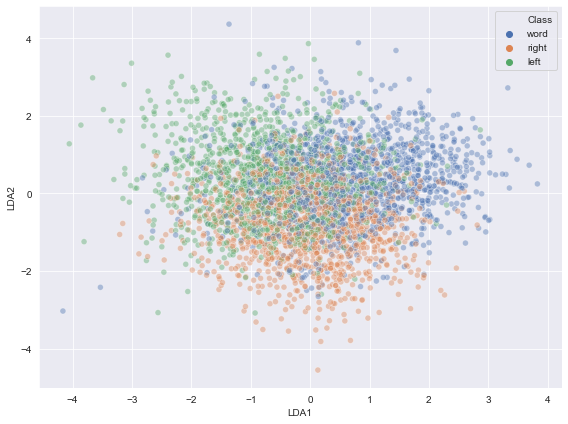

In [18]:
fig = plt.figure(figsize=(8,6))

LDA_visualization(data_transformed)

fig.tight_layout()
plt.savefig('figures/LDA_data_transformed.png')

# 3. Resampling method

In [19]:
# prepare data for modeling and separate labels 

X_train = np.delete(training, 96, 1)
y_train = training[:,96]

X_test = np.delete(test, 96, 1) 
y_test = test[:,96] 

X_test1 = np.delete(test_subject1, 96, 1) 
y_test1 = test_subject1[:,96] 

X_test2 = np.delete(test_subject2, 96, 1) 
y_test2 = test_subject2[:,96] 

X_test3 = np.delete(test_subject3, 96, 1) 
y_test3 = test_subject3[:,96]  


# apply transformations

X_train =np.log(X_train)

X_test = np.log(X_test )

X_test1 =np.log(X_test1)
X_test2 =np.log(X_test2)
X_test3 =np.log(X_test3)

### Cross-validation stratified 5-fold for model selection

In [20]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

n_folds = 10
cv_strategy = StratifiedKFold(n_splits=n_folds)


# Pre: X_train, y_train, X_test, y_test and  X_test<subject>, y_test<subject> are globally defined
# Post: Returns fitted model with the parameters of the 
#       best cross-validate score (if any hyperparameters to search, parameter_space != None) 
def execute(pipeline, parameter_space = None):
    
    start = time.time()
    
    model = None
    data = None
    
    # case with no hyperparameters to search
    if (parameter_space == None):   
        model = pipeline.fit(X_train, y_train)
        data = get_cv_data(cross_validate(model, X_train, y_train, cv=cv_strategy, n_jobs=-1))
#         data = pd.DataFrame(cross_validate(model, X_train, y_train, cv=cv_strategy, n_jobs=-1))

    # case with hyperparameters to search    
    else:
        model = GridSearchCV(pipeline, parameter_space, cv = cv_strategy, iid=False, return_train_score=False, n_jobs= -1)
        model.fit(X_train, y_train)
        data =  get_gridcv_data(model.cv_results_)
#         data = pd.DataFrame(model.cv_results_)
    
    
    execution_time = time.time() - start 
    print('Total cross-validation execution time: ', execution_time)

    return model, data



def get_cv_data(cv_results):
    
    df = pd.DataFrame(cv_results)
    
    mean_test_score = df['test_score'].mean()
    std_test_score = df['test_score'].std()
    mean_fit_time = df['fit_time'].mean()
    std_fit_time = df['fit_time'].std()
    mean_score_time = df['score_time'].mean()
    std_score_time = df['score_time'].std()
    
    data = {'mean_test_score':[mean_test_score], 'std_test_score':[std_test_score],
            'mean_fit_time':[mean_fit_time], 'std_fit_time':[std_fit_time],
            'mean_score_time':[mean_score_time], 'std_score_time':[std_score_time]} 
    
    return pd.DataFrame(data)
    
    
def get_gridcv_data(gridcv_results):
    filtered = pd.DataFrame(gridcv_results)
    filtered = filtered[filtered.rank_test_score == 1]
    filtered = filtered[['params','mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time']]
    filtered.reset_index(drop=True, inplace=True)
    return filtered


def final_generalization_score(model):
    print("Test accuracy: ")
    print("\t subject1 -> ", model.score(X_test1, y_test1))
    print("\t subject2 -> ", model.score(X_test2, y_test2))
    print("\t subject3 -> ", model.score(X_test3, y_test3))
    print("\t GENERAL  -> ", model.score(X_test, y_test))


# 4. Modelling process

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# We need to do these preprocess steps inside the cross-validation (if not, test k-fold would be influenced by this preprocess)
# If inside the pipeline, every k-fold will apply the pipeline steps
scaler = StandardScaler()
pca = PCA(0.95)    

In [22]:
#checks if the model already exists, if it exists we compare to see which is the best, otherwise we create it
def update_model(modelname, modelData, model):
    if (path.exists("models/best_"+modelname+"_data.p") and hasattr(modelData, 'mean_test_score')):
        oldmodelData = pickle.load(open("models/best_"+modelname+"_data.p","rb"))
        if (oldmodelData.mean_test_score[0] < modelData.mean_test_score[0]):
            pickle.dump(model, open("models/best_"+modelname+"_model.p", "wb"))
            pickle.dump(modelData, open("models/best_"+modelname+"_data.p", "wb"))
    else:
        pickle.dump(model, open("models/best_"+modelname+"_model.p", "wb"))
        pickle.dump(modelData, open("models/best_"+modelname+"_data.p", "wb"))

# It searches for a model, if it exists, returns the model, otherwise returns 0
def get_model(modelname):
    model = 0
    if(path.exists("models/best_"+modelname+"_model.p")):
        model = pickle.load(open("models/best_"+modelname+"_model.p","rb"))
        
    return model

# It searches for a model data, if it exists, returns the model data, otherwise returns 0
def get_data(modelname):
    modelData = 0
    if(path.exists("models/best_"+modelname+"_data.p")):
        modelData = pickle.load(open("models/best_"+modelname+"_data.p","rb"))
        
    return modelData

# 4.1 Linear/Quadratic models

In [164]:
#load all linear/quadratic models if they exist, otherwise they contain 0

loaded_nbayes = get_model("nbayes") 
loaded_neighbors = get_model("Kneighbors")
loaded_MLP = get_model("MLP")

In [25]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf',GaussianNB())])

nbayes_model, nbayes_data = execute(pipeline)
nbayes_data['model'] = 'Naive Bayes' 
nbayes_data

Total cross-validation execution time:  1.606497049331665


,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,model
0,0.507642,0.099283,0.075007,0.008971,0.002299,0.000483,Naive Bayes


In [163]:
#After executing the upper block, updates the model if it is better than the previous one
update_model("nbayes", nbayes_data, nbayes_model)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf', KNeighborsClassifier())])
parameter_space = {
    'clf__n_neighbors': np.arange(5,25 +1),
    'clf__p': [1,2]   # 1 = manhattan, 2 = euclidean
}

kneigh_model, kneigh_data = execute(pipeline, parameter_space)
kneigh_data['model'] = 'KNeighbors' 
kneigh_data

Total cross-validation execution time:  34.38911581039429


c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


,params,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,model
0,"{'clf__n_neighbors': 22, 'clf__p': 2}",0.547347,0.114508,0.113435,0.009431,0.215276,0.02887,KNeighbors


In [122]:
(kneigh_data.params)

0    {'clf__n_neighbors': 22, 'clf__p': 2}
Name: params, dtype: object

In [161]:
#After executing the upper block, updates the model if it is better than the previous one
update_model("Kneighbors", kneigh_data, kneigh_model)

In [135]:
from sklearn.neural_network import MLPClassifier

# MLP default solver = 'adam', activation = 'relu'
pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf', MLPClassifier(max_iter=500))])

alphas = np.linspace(0.01,0.02,11)
parameter_space = {
    'clf__alpha': alphas, 
    'clf__hidden_layer_sizes':[(5,),(7,),(9,),(10,),(11,),(13,),(15,)],
    'clf__solver':["lbfgs", "sgd", "adam"],
    'clf__activation':[('identity'), ('logistic'), ('tanh'), ('relu')]
}

MLP_model, MLP_data = execute(pipeline, parameter_space)
MLP_data['model'] = 'MLP' 
MLP_data

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Total cross-validation execution time:  307.56089091300964


c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,params,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,model
0,"{'clf__activation': 'relu', 'clf__alpha': 0.01...",0.568892,0.095082,4.825337,0.082312,0.002099,0.0007,MLP


In [162]:
#After executing the upper block, updates the model if it is better than the previous one
update_model("MLP", MLP_data, MLP_model)

In [137]:
list(MLP_data.params)

[{'clf__activation': 'relu',
  'clf__alpha': 0.017,
  'clf__hidden_layer_sizes': (8,),
  'clf__solver': 'sgd'}]

# 4.2 Non-Linear models

### SVM-RBF

In [159]:
#load all linear/quadratic models if they exist, otherwise they contain 0

loaded_SVMRBF = get_model("SVMRBF") 
loaded_randomforest = get_model("random_forest")

In [119]:
# pendiente mirar lab svm para explorar hiperparametros
from sklearn.svm import SVC
pca = PCA(0.95)
# SVM with RBF kernel
pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf', SVC(gamma='scale'))])
parameter_space = {
    'clf__C': [1+0.025*n for n in range(0,40)]
}
SVMRBF_model, SVMRBF_data = execute(pipeline, parameter_space)
SVMRBF_data['model'] = 'SVM RBF' 
pca = PCA(0.95)
SVMRBF_data

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Total cross-validation execution time:  139.1388156414032


,params,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,model
0,{'clf__C': 1.425},0.576317,0.105078,1.172929,0.034760,0.086851,0.006168,SVM RBF
1,{'clf__C': 1.45},0.576317,0.104827,1.206509,0.031120,0.088050,0.005465,SVM RBF
2,{'clf__C': 1.475},0.576317,0.104796,1.203211,0.033496,0.090648,0.006306,SVM RBF


In [140]:
# SVM with RBF kernel
pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf', SVC(gamma='scale'))])
parameter_space = {
    'clf__C': [1.425]
}
SVMRBF_model, SVMRBF_data = execute(pipeline, parameter_space)
SVMRBF_data['model'] = 'SVM RBF' 
SVMRBF_data

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Total cross-validation execution time:  7.271842002868652


,params,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,model
0,{'clf__C': 1.425},0.576317,0.105078,1.417388,0.149107,0.105139,0.032314,SVM RBF


In [141]:
#After executing the upper block, updates the model if it is better than the previous one
update_model("SVMRBF", SVMRBF_data, SVMRBF_model)

### Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier 

pipeline = Pipeline([('scaler', scaler),('clf', RandomForestClassifier( n_jobs=-1))])
parameter_space = {
    'clf__n_estimators': [260+n*20 for n in range(0,6)],
    'clf__max_depth': [20+n*5 for n in range(0,4)],
    'clf__min_samples_leaf': [5,10,15]
}
randomforest_model, randomforest_data = execute(pipeline, parameter_space)
randomforest_data['model'] = 'Random Forest'
randomforest_data

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Total cross-validation execution time:  683.8068475723267


,params,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,model
0,"{'clf__max_depth': 25, 'clf__min_samples_leaf'...",0.595789,0.103817,5.000036,0.235996,0.983436,0.214741,Random Forest


In [158]:
list(randomforest_data.params)

[{'clf__max_depth': 25, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 320}]

In [153]:
#After executing the upper block, updates the model if it is better than the previous one
update_model("random_forest", randomforest_data, randomforest_model)

# 5. Final Model selection and Generalization error

### Comparativa

In [155]:
best_nbayes_data = get_data("nbayes") 
best_kneigh_data = get_data("Kneighbors")
best_MLP_data = get_data("MLP")
best_SVMRBF_data = get_data("SVMRBF") 
best_randomforest_data = get_data("random_forest")

df = pd.concat([best_nbayes_data, best_kneigh_data, best_MLP_data, SVMRBF_data, best_randomforest_data], sort = False)
df.reset_index(drop=True, inplace=True)
column_model = df['model']
df.drop(labels=['model'], axis=1,inplace = True)
df.insert(0, 'model', column_model)

df

,model,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params
0,Naive Bayes,0.509588,0.100419,0.075157,0.014226,0.003598,0.002795,NaN
1,KNeighbors,0.547975,0.115069,0.069060,0.008603,0.210179,0.010976,"{'clf__n_neighbors': 22, 'clf__p': 2}"
2,MLP,0.568892,0.095082,4.825337,0.082312,0.002099,0.000700,"{'clf__activation': 'relu', 'clf__alpha': 0.01..."
3,SVM RBF,0.576317,0.105078,1.417388,0.149107,0.105139,0.032314,{'clf__C': 1.425}
4,Random Forest,0.597071,0.100248,3.035961,0.340827,0.820331,0.324968,"{'clf__max_depth': 20, 'clf__min_samples_leaf'..."


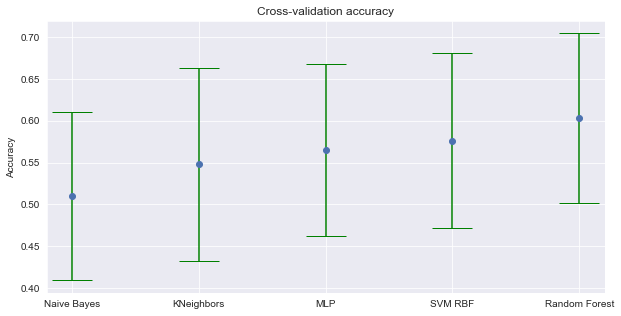

In [85]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,1,1)
plt.title('Cross-validation accuracy')
plt.ylabel('Accuracy')
plt.errorbar(df.model, df.mean_test_score, yerr=df.std_test_score, fmt='o',ecolor='g', capsize=20);

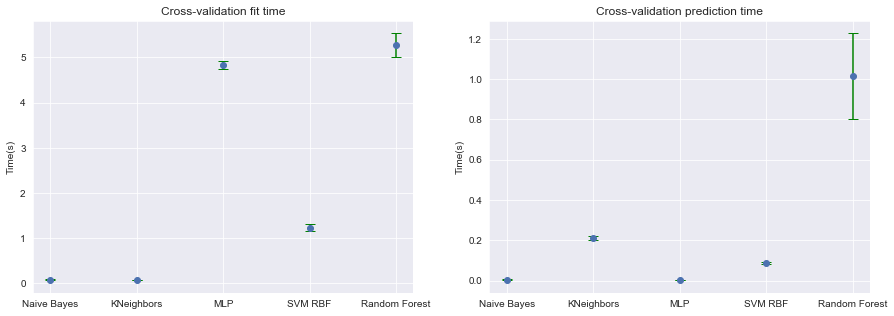

In [84]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
plt.title('Cross-validation fit time')
plt.ylabel('Time(s)')
plt.errorbar(df.model, df.mean_fit_time, yerr=df.std_fit_time, fmt='o',ecolor='g', capsize=5);

ax = fig.add_subplot(1,2,2)
plt.title('Cross-validation prediction time')
plt.ylabel('Time(s)')
plt.errorbar(df.model, df.mean_score_time, yerr=df.std_score_time, fmt='o',ecolor='g', capsize=5);

In [157]:
# Given the previous plots, we choose a trained model
final_generalization_score(SVMRBF_model)

Test accuracy: 
	 subject1 ->  0.7968036529680366
	 subject2 ->  0.6382488479262672
	 subject3 ->  0.5298165137614679
	 GENERAL  ->  0.6551987767584098
